Done.
Done.
Done.
Done.
Image Label:  3
Writing train text file...
Saving data\MNIST\Train-28x28_cntk_text.txt
Writing test text file...
Saving data\MNIST\Test-28x28_cntk_text.txt
Done
Data directory is data\MNIST
Minibatch: 0, Loss: 2.2922, Error: 82.00%
Minibatch: 500, Loss: 0.4134, Error: 8.00%
Minibatch: 1000, Loss: 0.2821, Error: 8.00%
Minibatch: 1500, Loss: 0.4347, Error: 10.00%
Minibatch: 2000, Loss: 0.3212, Error: 16.00%
Minibatch: 2500, Loss: 0.1407, Error: 2.00%
Minibatch: 3000, Loss: 0.1996, Error: 10.00%
Minibatch: 3500, Loss: 0.2281, Error: 8.00%
Minibatch: 4000, Loss: 0.2413, Error: 6.00%
Minibatch: 4500, Loss: 0.1130, Error: 2.00%
Minibatch: 5000, Loss: 0.3756, Error: 12.00%
Minibatch: 5500, Loss: 0.2362, Error: 4.00%
Minibatch: 6000, Loss: 0.1687, Error: 2.00%
Minibatch: 6500, Loss: 0.3409, Error: 16.00%
Minibatch: 7000, Loss: 0.0739, Error: 4.00%
Minibatch: 7500, Loss: 0.3213, Error: 6.00%
Minibatch: 8000, Loss: 0.3302, Error: 10.00%
Minibatch: 8500, Loss: 0.2710, Erro

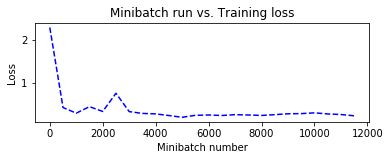

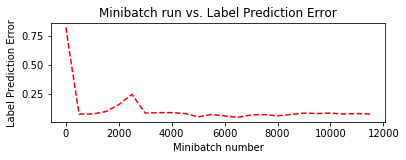

Average test error: 6.95%
Label    : [4, 5, 6, 7, 8, 9, 7, 4, 6, 1, 4, 0, 9, 9, 3, 7, 8, 4, 7, 5, 8, 5, 3, 2, 2]
Predicted: [4, 6, 6, 7, 5, 9, 7, 4, 6, 1, 4, 0, 4, 9, 3, 7, 1, 2, 7, 5, 8, 6, 3, 2, 2]
Image Label:  9


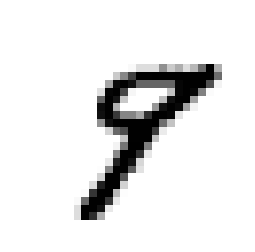

In [1]:
# Import the relevant modules
from __future__ import print_function
import gzip 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import struct
import sys
import cntk as C
try: # Different versions of urllib
    from urllib.request import urlretrieve 
except:
    from urllib import urlretrieve
    
% matplotlib inline

# Functions to load MNIST images and unpack into train and test set.
# - loadData reads image data and formats into a 28x28 long array
# - loadLabels reads the corresponding labels data, 1 for each image
# - load packs the downloaded image and labels data into a combined format to be read later by 
#   CNTK text reader 

def loadData(src, cimg):
    print ('Downloading ' + src)  # src short for source is the url of the file we intend to download
    gzfname, h = urlretrieve(src, './delete.me') # This routine is used to do the actual download
    print ('Done.') # When download is don print done
    try: # Start a try/finally block
        with gzip.open(gzfname) as gz: # because gzfname downloaded is a zip file, we open it with gzip and call the object gz
            n = struct.unpack('I', gz.read(4)) # We unpack the first 4 bytes of the gz and convert to integer
            # Read magic number.
            if n[0] != 0x3080000: # check if the first element in `n` is not equal to the majic number for zip files
                raise Exception('Invalid file: unexpected magic number.') # exception to be raised if above not true 
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))[0] # We read the next 4 bytes as big endian and save first item as n
            if n != cimg: # Check if n = image count
                raise Exception('Invalid file: expected {0} entries.'.format(cimg)) # Raise this exception error if the aforementioned is not true
            crow = struct.unpack('>I', gz.read(4))[0] # Next 4 bytes as count of rows
            ccol = struct.unpack('>I', gz.read(4))[0] # Next 4 bytes as count of column
            if crow != 28 or ccol != 28: # Verify that the count of rows and columns is 28 by 28
                raise Exception('Invalid file: expected 28 rows/cols per image.') # raise exception if aforementioned is false
            # Read data.
            res = np.fromstring(gz.read(cimg * crow * ccol), dtype = np.uint8) # This read the image into bytes: cimg, crow, ccol
    finally:
        os.remove(gzfname) # this removes the delete.me file created above
    return res.reshape((cimg, crow * ccol)) # reshapes it such that ech row represents a a single image

def loadLabels(src, cimg): # define function to load label
    print ('Downloading ' + src) # Print downloading message
    gzfname, h = urlretrieve(src, './delete.me') # start downloading using the the urlretrieve routine
    print ('Done.') # When downloading is finished print Done
    try: # Begin a try/finally block
        with gzip.open(gzfname) as gz: # since file downloaded is a zip file we unzip it using gzip and save the object as gz
            n = struct.unpack('I', gz.read(4)) # unpack the first 4 bytes of gz as integer and save as n
            # Read magic number.
            if n[0] != 0x1080000: # confirm that the first item in n is the given magic number
                raise Exception('Invalid file: unexpected magic number.') # if the above is False raise the exception
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4)) # We read the next 4 bytes as big endian and save as n
            if n[0] != cimg: # Verify that the first item in n is same as the image count in of labelled files
                raise Exception('Invalid file: expected {0} rows.'.format(cimg)) # print out exception if condition not met
            # Read labels.
            res = np.fromstring(gz.read(cimg), dtype = np.uint8) # read image
    finally:
        os.remove(gzfname) # we remove the delete.me file
    return res.reshape((cimg, 1)) # reshape label

def try_download(dataSrc, labelsSrc, cimg): # define a download function that downloads both data, label, and image count
    data = loadData(dataSrc, cimg) # download data
    labels = loadLabels(labelsSrc, cimg) # download labels
    return np.hstack((data, labels)) # stacks the labels horizontaly by the data


# URLs for the train image and labels data
url_train_image = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz' # mnist url for train data
url_train_labels = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz' # mnist url for train labels
num_train_samples = 60000 # number of samples

print("Downloading train data")
train = try_download(url_train_image, url_train_labels, num_train_samples)# download train data


url_test_image = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz' # mnist url for test data
url_test_labels = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz' #mnist url for test labels
num_test_samples = 10000 # number of test samples

print("Downloading test data")
test = try_download(url_test_image, url_test_labels, num_test_samples) # download test samples

# Plot a random image
sample_number = 5001
plt.imshow(train[sample_number,:-1].reshape(28,28), cmap="gray_r")
plt.axis('off')
print("Image Label: ", train[sample_number,-1])

# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, ndarray): 
    dir = os.path.dirname(filename) # This extracts the directory name from the filename

    if not os.path.exists(dir): # make sure that it exists. 
        os.makedirs(dir) # If it doesn't exist we create it

    if not os.path.isfile(filename): # check if file already exist
        print("Saving", filename ) # print 'saving filename'
        with open(filename, 'w') as f: # opens file with write and store file object as f
            labels = list(map(' '.join, np.eye(10, dtype=np.uint).astype(str))) # Creats a 10-by-10 one-hot label using the np.eye
            for row in ndarray: # iterate through each row in array
                row_str = row.astype(str) # convert row to string
                label_str = labels[row[-1]] # Index the one-hot label by row[-1]
                feature_str = ' '.join(row_str[:-1]) # take row value up to the last column and store 
                f.write('|labels {} |features {}\n'.format(label_str, feature_str)) # write into the file f
    else:
        print("File already exists", filename)


# Save the train and test files (prefer our default path for the data)
data_dir = os.path.join("..", "Examples", "Image", "DataSets", "MNIST")
if not os.path.exists(data_dir):
    data_dir = os.path.join("data", "MNIST")

print ('Writing train text file...')
savetxt(os.path.join(data_dir, "Train-28x28_cntk_text.txt"), train)

print ('Writing test text file...')
savetxt(os.path.join(data_dir, "Test-28x28_cntk_text.txt"), test)

print('Done')

# Select the right target device when this notebook is being tested:
# In the block below, we check if we are running this notebook in the CNTK internal test machines 
# by looking for environment variables defined there. We then select the right target device (GPU vs CPU) to test this notebook.
# In other cases, we use CNTK's default policy to use the best available device (GPU, if available, else CPU).
if 'TEST_DEVICE' in os.environ:
    if os.environ['TEST_DEVICE'] == 'cpu':
        C.device.try_set_default_device(C.device.cpu())
    else:
        C.device.try_set_default_device(C.device.gpu(0))

# Test for CNTK version
if not C.__version__ == "2.5.1":
    raise Exception("this lab is designed to work with 2.0. Current Version: " + C.__version__) 

# Ensure we always get the same amount of randomness
np.random.seed(0)
C.cntk_py.set_fixed_random_seed(1)
C.cntk_py.force_deterministic_algorithms()

# Define the data dimensions
input_dim = 784
num_output_classes = 10

# Read a CTF formatted text (as mentioned above) using the CTF deserializer from a file
def create_reader(path, is_training, input_dim, num_label_classes):
    
    labelStream = C.io.StreamDef(field='labels', shape=num_label_classes, is_sparse=False) # this extracts one of the streams in the in the CTF formated file. In this case 'label'
    featureStream = C.io.StreamDef(field='features', shape=input_dim, is_sparse=False) # this extracts one of the streams in the in the CTF formated file. In this case 'features'
    
    deserailizer = C.io.CTFDeserializer(path, C.io.StreamDefs(labels = labelStream, features = featureStream))
            
    return C.io.MinibatchSource(deserailizer,
       randomize = is_training, max_sweeps = C.io.INFINITELY_REPEAT if is_training else 1)

# Ensure the training and test data is generated and available for this lab.
# We search in two locations in the toolkit for the cached MNIST data set.
data_found = False

for data_dir in [os.path.join("..", "Examples", "Image", "DataSets", "MNIST"),
                 os.path.join("data", "MNIST")]:
    train_file = os.path.join(data_dir, "Train-28x28_cntk_text.txt")
    test_file = os.path.join(data_dir, "Test-28x28_cntk_text.txt")
    if os.path.isfile(train_file) and os.path.isfile(test_file):
        data_found = True
        break
        
if not data_found:
    raise ValueError("Please generate the data by completing Lab1_MNIST_DataLoader")
    
print("Data directory is {0}".format(data_dir))

input = C.input_variable(input_dim) # creates input variable
label = C.input_variable(num_output_classes) # creates labels for the input variables 

def create_model(features):
    with C.layers.default_options(init = C.glorot_uniform()): # Initialize weights and bias with a uniform distribution of values 
        r = C.layers.Dense(num_output_classes, activation = None)(features) # we creates layers with no activation function because this will be done with softmax
        return r

# Scale the input to 0-1 range by dividing each pixel by 255.
input_s1 = input/255
input_s2 = C.square(input_s1)
input_s3 = C.sqrt(input_s2)
z = create_model(C.splice(input_s1,input_s2, input_s3))

loss = C.cross_entropy_with_softmax(z, label) # creates loss function using cross entropy with softmax

label_error = C.classification_error(z, label) # 1 if label and prediction is same 0 if different

# Instantiate the trainer object to drive the model training
learning_rate = 0.2
lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.minibatch)
learner = C.sgd(z.parameters, lr_schedule) # Defines the type of gradient decent to be used
trainer = C.Trainer(z, (loss, label_error), [learner])

# Define a utility function to compute the moving average sum.
# A more efficient implementation is possible with np.cumsum() function
def moving_average(a, w=5):
    if len(a) < w:
        return a[:]    # Need to send a copy of the array
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


# Defines a utility that prints the training progress
def print_training_progress(trainer, mb, frequency, verbose=1):
    training_loss = "NA"
    eval_error = "NA"

    if mb%frequency == 0:
        training_loss = trainer.previous_minibatch_loss_average
        eval_error = trainer.previous_minibatch_evaluation_average
        if verbose: 
            print ("Minibatch: {0}, Loss: {1:.4f}, Error: {2:.2f}%".format(mb, training_loss, eval_error*100))
        
    return mb, training_loss, eval_error

# Initialize the parameters for the trainer
minibatch_size = 50
num_samples_per_sweep = 60000
num_sweeps_to_train_with = 10 # number of iterations
num_minibatches_to_train = (num_samples_per_sweep * num_sweeps_to_train_with) / minibatch_size

# Create the reader to training data set
reader_train = create_reader(train_file, True, input_dim, num_output_classes)

# Map the data streams to the input and labels.
input_map = {
    label  : reader_train.streams.labels,
    input  : reader_train.streams.features
} 

# Run the trainer on and perform model training
training_progress_output_freq = 500

plotdata = {"batchsize":[], "loss":[], "error":[]}

for i in range(0, int(num_minibatches_to_train)):
    
    # Read a mini batch from the training data file
    data = reader_train.next_minibatch(minibatch_size, input_map = input_map)
    
    trainer.train_minibatch(data)
    batchsize, loss, error = print_training_progress(trainer, i, training_progress_output_freq, verbose=1)
    
    if not (loss == "NA" or error =="NA"):
        plotdata["batchsize"].append(batchsize)
        plotdata["loss"].append(loss)
        plotdata["error"].append(error)

# Compute the moving average loss to smooth out the noise in SGD
plotdata["avgloss"] = moving_average(plotdata["loss"])
plotdata["avgerror"] = moving_average(plotdata["error"])

# Plot the training loss and the training error
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(211)
plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')
plt.title('Minibatch run vs. Training loss')

plt.show()

plt.subplot(212)
plt.plot(plotdata["batchsize"], plotdata["avgerror"], 'r--')
plt.xlabel('Minibatch number')
plt.ylabel('Label Prediction Error')
plt.title('Minibatch run vs. Label Prediction Error')
plt.show()

# Read the training data
reader_test = create_reader(test_file, False, input_dim, num_output_classes)

test_input_map = {
    label  : reader_test.streams.labels,
    input  : reader_test.streams.features,
}

# Test data for trained model
test_minibatch_size = 512
num_samples = 10000
num_minibatches_to_test = num_samples // test_minibatch_size
test_result = 0.0

for i in range(num_minibatches_to_test):
    
    # We are loading test data in batches specified by test_minibatch_size
    # Each data point in the minibatch is a MNIST digit image of 784 dimensions 
    # with one pixel per dimension that we will encode / decode with the 
    # trained model.
    data = reader_test.next_minibatch(test_minibatch_size,
                                      input_map = test_input_map)

    eval_error = trainer.test_minibatch(data)
    test_result = test_result + eval_error

# Average of evaluation errors of all test minibatches
print("Average test error: {0:.2f}%".format(test_result*100 / num_minibatches_to_test))

out = C.softmax(z)

# Read the data for evaluation
reader_eval = create_reader(test_file, False, input_dim, num_output_classes)

eval_minibatch_size = 25
eval_input_map = {input: reader_eval.streams.features} 

data = reader_test.next_minibatch(eval_minibatch_size, input_map = test_input_map)

img_label = data[label].asarray()
img_data = data[input].asarray()
predicted_label_prob = [out.eval(img_data[i]) for i in range(len(img_data))]

# Find the index with the maximum value for both predicted as well as the ground truth
pred = [np.argmax(predicted_label_prob[i]) for i in range(len(predicted_label_prob))]
gtlabel = [np.argmax(img_label[i]) for i in range(len(img_label))]

print("Label    :", gtlabel[:25])
print("Predicted:", pred)

# Plot a random image
sample_number = 5
plt.imshow(img_data[sample_number].reshape(28,28), cmap="gray_r")
plt.axis('off')

img_gt, img_pred = gtlabel[sample_number], pred[sample_number]
print("Image Label: ", img_pred)



In [48]:
C.splice(input_s1,input_s2, input_s3).shape

(2352,)